<a href="https://colab.research.google.com/github/NgPcAnhh/Descriptive-statistics-Correlation-of-EPL-strikers-nationality-and-their-performance/blob/main/forward_scouting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



---


📊 Phát biểu bài toán:

⚽ Ngoại hạng Anh (Premier League) từ lâu đã được xem là một trong những giải đấu khắc nghiệt và cạnh tranh nhất thế giới, dần trở thành thước đo quan trọng để đánh giá năng lực của các tiền đạo hàng đầu. Nhiều chân sút xuất sắc khi chuyển đến môi trường này đều gặp khó khăn trong việc:

- 📉 Duy trì phong độ ổn định
- 🏃 Thích nghi với nhịp độ thi đấu dày đặc
- 💪 Đối mặt với lối chơi giàu thể lực, áp sát nhanh
- 🌧️ Chịu ảnh hưởng từ điều kiện thời tiết lạnh giá, ẩm ướt đặc trưng của "xứ sở sương mù"
- 👉 Vấn đề đặt ra:
Phải chăng các yếu tố như văn hóa, thời tiết, môi trường bóng đá và phong cách thi đấu đặc thù tại Anh chính là rào cản khiến các tiền đạo khó phát triển sự nghiệp?

❓ Các câu hỏi nghiên cứu chính:

📌 Liệu có sự khác biệt đáng kể trong khả năng thích nghi của các tiền đạo đến từ các quốc gia hoặc châu lục khác nhau khi thi đấu tại Ngoại hạng Anh?

📊 Các chỉ số thống kê (goals, assists, shooting accuracy, big chances missed,...) có thể phản ánh xu hướng thích nghi và khả năng tận dụng thế mạnh của các tiền đạo đến từ các khu vực khác nhau như thế nào?

🌍 Tiền đạo từ đâu có khả năng thích nghi tốt nhất với môi trường Ngoại hạng Anh, và yếu tố nào giúp họ thành công?


✅ Mục tiêu của bài toán:
Phân tích số liệu thống kê của các tiền đạo thi đấu tại Ngoại hạng Anh để:

Xác định mối quan hệ giữa quốc gia xuất thân và khả năng thích nghi, thành công.
Phân loại các kiểu tiền đạo theo lối chơi và khả năng đóng góp vào đội bóng.
Đưa ra nhận định về việc yếu tố ngoại cảnh (văn hóa, thời tiết, phong cách thi đấu) ảnh hưởng ra sao đến sự thành công của tiền đạo.


---

Phân tích bài toán: Ta chọn nguồn thông tin chính thức bao gồm các thống kê số liệu của 200 tiền đạo hàng đầu của Premier league (xếp theo số bàn thắng ghi được) trên trang chủ của giải ngoại hạng. Sau đó chọn lọc ra những chỉ số cần thiết để có thể đưa ra kết luận từ thống kê và mô tả.

Biến độc lập: Quốc tịch


Biến phụ thuộc:
| goals |	goals_per_match |	headed_goals | shooting_accuracy |	hit_woodwork | big_chances_missed	| assists |	big_chances_created |

* Giải thích:


---

Dự đoán mô phỏng:

| Loại tiền đạo                      | Đặc điểm nhận dạng qua chỉ số                                            |
|------------------------------------|--------------------------------------------------------------------------|
| Tiền đạo săn bàn (Poacher)         | Goals cao, goals_per_match cao, shooting_accuracy cao, headed_goals thấp, assists thấp.          |
| Tiền đạo toàn diện (Complete)      | Goals cao, assists cao, shooting_accuracy ổn, big_chances_created cao.                        |
| Tiền đạo không chiến (Target Man)  | Headed_goals cao, shooting_accuracy trung bình, big_chances_missed thấp.                       |
| Tiền đạo hỗ trợ (False 9)          | Goals trung bình, assists cao, big_chances_created cao, shooting_accuracy thấp hơn.             |
| Tiền đạo tốc độ (Advanced Forward) | Goals trung bình đến cao, shooting_accuracy cao, big_chances_missed cao, headed_goals thấp.    |
| Tiền đạo tận dụng cơ hội (Clinical)| Goals cao, shooting_accuracy rất cao, big_chances_missed thấp.                                 |
| Tiền đạo trung bình       | Goals trung bình, big_chances_missed trung bình, assists trung bình, shooting_accuracy trung bình. |
| Tiền đạo dứt điểm kém              | Goals thấp, big_chances_missed cao, shooting_accuracy thấp.                                    |
| Tiền đạo đơn độc (Lone Striker)    | Goals trung bình, headed_goals trung bình đến cao, assists thấp, shooting_accuracy ổn.         |
| Tiền đạo kiến thiết (Deep-lying)   | Goals thấp, assists cao, big_chances_created cao, shooting_accuracy trung bình hoặc thấp.       |
| Tiền đạo hỗn hợp (Hybrid)          | Goals trung bình đến cao, assists trung bình, shooting_accuracy ổn, linh hoạt nhiều vai trò.   |
| Tiền đạo kém may mắn               | Goals trung bình, shooting_accuracy cao nhưng hit_woodwork cao, big_chances_missed trung bình. |



# Khai báo thư viện cần thiết

In [1]:
!pip install beautifulsoup4

In [2]:
# crawl dataa
from bs4 import BeautifulSoup
import pandas as pd
import requests
import json
import numpy as np

# xử lý dữ liệu
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Crawl data

In [3]:
results = []

# Crawl từ page 0 đến 19
for page_num in range(42):
    # Tạo URL với số trang hiện tại
    current_url = f"https://footballapi.pulselive.com/football/stats/ranked/players/goals?page={page_num}&pageSize=10&comps=1&compCodeForActivePlayer=EN_PR&positions=FORWARD&altIds=true"

    print(f"\nCrawling page {page_num}...")
    print(f"URL: {current_url}")

    # Gửi request và lấy data
    response = requests.get(current_url)
    data = response.json()

    # Lấy content từ JSON response
    content = data["stats"]["content"]

    for item in content:
        try:
            owner = item["owner"]
            name = owner["name"]["display"]
            id = int(owner["id"])

            # Try to get country, fall back to isoCode if country is not available
            try:
                country = owner["nationalTeam"]["country"]
            except (KeyError, TypeError):
                try:
                    country = owner["nationalTeam"]["isoCode"]
                except (KeyError, TypeError):
                    # Skip this item if both country and isoCode are missing
                    print(f"Skipped item: Missing country information for {owner.get('name', {}).get('display', 'Unknown player')}")
                    continue

            # Thêm vào kết quả
            player_info = {
                "name": name,
                "country": country,
                "id": id
            }
            results.append(player_info)
            print(f"Added: {player_info}")
        except Exception as e:
            print(f"Error processing item: {e}")
            continue
            print(f"Added: {player_info}")


# In kết quả cuối cùng
print("\nFinal Results:")
print(json.dumps(results, indent=2))


Crawling page 0...
URL: https://footballapi.pulselive.com/football/stats/ranked/players/goals?page=0&pageSize=10&comps=1&compCodeForActivePlayer=EN_PR&positions=FORWARD&altIds=true
Added: {'name': 'Alan Shearer', 'country': 'England', 'id': 89}
Added: {'name': 'Harry Kane', 'country': 'England', 'id': 3960}
Added: {'name': 'Wayne Rooney', 'country': 'England', 'id': 2064}
Added: {'name': 'Andrew Cole', 'country': 'England', 'id': 725}
Added: {'name': 'Sergio Agüero', 'country': 'Argentina', 'id': 4328}
Added: {'name': 'Mohamed Salah', 'country': 'Egypt', 'id': 5178}
Added: {'name': 'Thierry Henry', 'country': 'France', 'id': 1659}
Added: {'name': 'Robbie Fowler', 'country': 'England', 'id': 277}
Added: {'name': 'Jermain Defoe', 'country': 'England', 'id': 1526}
Added: {'name': 'Michael Owen', 'country': 'England', 'id': 1208}

Crawling page 1...
URL: https://footballapi.pulselive.com/football/stats/ranked/players/goals?page=1&pageSize=10&comps=1&compCodeForActivePlayer=EN_PR&positions

In [4]:
players_full_stats = []

for player in results:
    player_id = player["id"]
    player_stats_url = f'https://www.premierleague.com/players/{player_id}/player/stats'

    print(f"\nCrawling stats for player ID {player_id}...")
    print(f"URL: {player_stats_url}")

    try:
        response = requests.get(player_stats_url)
        soup = BeautifulSoup(response.text, 'html.parser')

        # Thu thập stats và loại bỏ khoảng trắng, ký tự xuống dòng
        stats = {
            "id": player_id,
            "name": player["name"],
            "country": player["country"],
            "goals": soup.find('span', class_='statgoals').text.strip() if soup.find('span', class_='statgoals') else "N/A",
            "goals_per_match": soup.find('span', class_='statgoals_per_game').text.strip() if soup.find('span', class_='statgoals_per_game') else "N/A",
            "headed_goals": soup.find('span', class_='statatt_hd_goal').text.strip() if soup.find('span', class_='statatt_hd_goal') else "N/A",
            "shooting_accuracy": soup.find('span', class_='statshot_accuracy').text.strip() if soup.find('span', class_='statshot_accuracy') else "N/A",
            "hit_woodwork": soup.find('span', class_='stathit_woodwork').text.strip() if soup.find('span', class_='stathit_woodwork') else "N/A",
            "big_chances_missed": soup.find('span', class_='statbig_chance_missed').text.strip() if soup.find('span', class_='statbig_chance_missed') else "N/A",
            "assists": soup.find('span', class_='statgoal_assist').text.strip() if soup.find('span', class_='statgoal_assist') else "N/A",
            "big_chances_created": soup.find('span', class_='statbig_chance_created').text.strip() if soup.find('span', class_='statbig_chance_created') else "N/A"
        }

        # Thêm vào danh sách kết quả
        players_full_stats.append(stats)
        print(f"Added stats for: {player['name']}")

    except Exception as e:
        print(f"Error crawling stats for player {player_id}: {str(e)}")
        continue

# In kết quả cuối cùng
print("\nFinal Results with Full Stats:")
print(json.dumps(players_full_stats, indent=2))
print(f"\nTotal players processed: {len(players_full_stats)}")

Kết quả truyền trực tuyến bị cắt bớt đến 5000 dòng cuối.
    "hit_woodwork": "1",
    "big_chances_missed": "0",
    "assists": "37",
    "big_chances_created": "0"
  },
  {
    "id": 4481,
    "name": "Olivier Giroud",
    "country": "France",
    "goals": "90",
    "goals_per_match": "0.35",
    "headed_goals": "32",
    "shooting_accuracy": "39%",
    "hit_woodwork": "20",
    "big_chances_missed": "88",
    "assists": "28",
    "big_chances_created": "41"
  },
  {
    "id": 1249,
    "name": "Kevin Davies",
    "country": "England",
    "goals": "88",
    "goals_per_match": "0.2",
    "headed_goals": "15",
    "shooting_accuracy": "37%",
    "hit_woodwork": "6",
    "big_chances_missed": "14",
    "assists": "55",
    "big_chances_created": "10"
  },
  {
    "id": 8454,
    "name": "Callum Wilson",
    "country": "England",
    "goals": "88",
    "goals_per_match": "0.39",
    "headed_goals": "15",
    "shooting_accuracy": "44%",
    "hit_woodwork": "13",
    "big_chances_missed": 

# xuất dữ liệu ra csv

In [5]:
from google.colab import drive
import csv

# Mount Google Drive
drive.mount('/content/drive')

# Tạo đường dẫn để lưu file trong Google Drive
save_path = '/content/drive/My Drive/Kinh tế lượng/dataset/'  # Thay đổi đường dẫn folder muốn lưu

filename = f'player_stats_EPL.csv'

# Tạo đường dẫn đầy đủ
full_path = save_path + filename

# Ghi data vào file CSV trực tiếp trong Drive
with open(full_path, 'w', newline='', encoding='utf-8') as file:
    fieldnames = [
        'id',
        'name',
        'country',
        'goals',
        'goals_per_match',
        'headed_goals',
        'shooting_accuracy',
        'hit_woodwork',
        'big_chances_missed',
        'assists',
        'big_chances_created'
    ]

    writer = csv.DictWriter(file, fieldnames=fieldnames)
    writer.writeheader()

    for player in players_full_stats:
        writer.writerow(player)

print(f"Data has been saved to Google Drive at: {full_path}")

Mounted at /content/drive
Data has been saved to Google Drive at: /content/drive/My Drive/Kinh tế lượng/dataset/player_stats_EPL.csv


# Xử lý dữ liệu

In [19]:
import pandas as pd

# Hiển thị toàn bộ cột và dòng
pd.set_option('display.max_columns', None)  # Không giới hạn số cột
pd.set_option('display.max_rows', None)     # Không giới hạn số dòng

# Điều chỉnh chiều rộng tối đa để sử dụng toàn bộ không gian
pd.set_option('display.width', 200)         # Tăng chiều rộng tối đa

In [20]:
import pandas as pd
import numpy as np

# Đọc file CSV
df = pd.read_csv('/content/drive/My Drive/Kinh tế lượng/dataset/player_stats_EPL.csv')

# Tạo bản sao để không ảnh hưởng đến df gốc
df_processed = df.copy()

# Danh sách các cột cần xử lý
columns_to_process = [
    'headed_goals',
    'shooting_accuracy',
    'hit_woodwork',
    'big_chances_missed',
    'big_chances_created'
]

# Xử lý từng cột
for col in columns_to_process:
    # Kiểm tra kiểu dữ liệu của cột
    if df_processed[col].dtype == 'object':  # Nếu cột là kiểu string
        # Xử lý cột có chứa '%'
        df_processed[col] = df_processed[col].apply(lambda x: str(x).replace('%', '') if isinstance(x, str) else x)
        df_processed[col] = pd.to_numeric(df_processed[col], errors='coerce')

    # Tính giá trị trung bình (bỏ qua giá trị 0 và NA) => đổi giá trị 0 có thể là web EPL ko cập nhật sang giá trị trung bình của tập data
    mean_value = df_processed[df_processed[col] > 0][col].mean()

#  => đổi giá trị 0 có thể là web EPL ko cập nhật sang giá trị trung bình của tập data
    # Thay thế giá trị 0 và NA bằng mean
    df_processed.loc[df_processed[col].isin([0, np.nan]), col] = mean_value

    # Làm tròn và định dạng
    if col == 'shooting_accuracy':
        df_processed[col] = df_processed[col].round(2).astype(str) + '%'
    else:
        df_processed[col] = df_processed[col].round(2)

df_processed = df_processed.head(413) # lý do là crawl hơn 800 cầu thủ như có 400 cầu thủ có chỉ số dưới 10 bàn, và các chỉ số khác quá yếu
# => loại bỏ để đảm dữ liệu đẹp hơn

# In kết quả
print("\nDữ liệu sau khi xử lý:")
print(df_processed)



Dữ liệu sau khi xử lý:
         id                       name               country  goals  goals_per_match  headed_goals shooting_accuracy  hit_woodwork  big_chances_missed  assists  big_chances_created
0        89               Alan Shearer               England    260             0.59           6.6            100.0%          7.12               27.29       64                18.62
1      3960                 Harry Kane               England    213             0.67          40.0             44.0%         36.00              128.00       46                81.00
2      2064               Wayne Rooney               England    208             0.42          21.0             38.0%         29.00               54.00      103                65.00
3       725                Andrew Cole               England    187             0.45           6.6             41.0%          7.12               27.29       73                18.62
4      4328              Sergio Agüero             Argentina    184    

<ipython-input-20-cd43364db473>:32: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '6.6' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_processed.loc[df_processed[col].isin([0, np.nan]), col] = mean_value
<ipython-input-20-cd43364db473>:32: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '40.104729729729726' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_processed.loc[df_processed[col].isin([0, np.nan]), col] = mean_value
<ipython-input-20-cd43364db473>:32: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '7.116104868913857' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_processed.loc[df_processed[col].isin([0, np.nan

# Thống kê và mô tả

Các chỉ số thống kê được sử dụng trong code
Dựa trên đoạn code bạn đã cung cấp, tôi sẽ liệt kê và mô tả các chỉ số thống kê được sử dụng trong hàm generate_statistics_report():

1. Thống kê xu hướng trung tâm (Central Tendency Statistics)
Mean (Trung bình): Giá trị trung bình của tập dữ liệu, được tính bằng tổng các giá trị chia cho số lượng quan sát.
Median (Trung vị): Giá trị nằm ở giữa khi sắp xếp dữ liệu theo thứ tự tăng dần.
Mode (Mode): Giá trị xuất hiện nhiều nhất trong tập dữ liệu.
2. Thống kê độ phân tán (Dispersion Statistics)
Standard Deviation (Độ lệch chuẩn): Đo lường mức độ phân tán của dữ liệu so với giá trị trung bình.
Variance (Phương sai): Bình phương của độ lệch chuẩn, đo lường sự biến đổi của dữ liệu.
Range (Phạm vi): Hiệu giữa giá trị lớn nhất và nhỏ nhất trong tập dữ liệu.
IQR (Khoảng tứ phân vị): Hiệu giữa tứ phân vị thứ 3 (Q3) và tứ phân vị thứ 1 (Q1), đại diện cho phạm vi của 50% giá trị trung tâm.
Q1 (Tứ phân vị thứ nhất): Giá trị ở vị trí 25% của dữ liệu đã sắp xếp.
Q3 (Tứ phân vị thứ ba): Giá trị ở vị trí 75% của dữ liệu đã sắp xếp.
3. Thống kê hình dạng phân phối (Distribution Shape)
Skewness (Độ lệch): Đo lường độ không đối xứng của phân phối dữ liệu.
Skewness > 0: Phân phối lệch phải
Skewness < 0: Phân phối lệch trái
Skewness = 0: Phân phối đối xứng
Kurtosis (Độ nhọn): Đo lường độ "nhọn" của phân phối so với phân phối chuẩn.
Kurtosis > 0: Phân phối nhọn hơn phân phối chuẩn
Kurtosis < 0: Phân phối bẹt hơn phân phối chuẩn
Kurtosis = 0: Phân phối có độ nhọn tương đương phân phối chuẩn
4. Thống kê tần suất (Frequency Statistics)
Frequency (Tần suất): Đếm số lần xuất hiện của mỗi giá trị (trong code này áp dụng cho biến 'country').
5. Phân tích giá trị thiếu (Missing Values Analysis)
Missing Values Count: Đếm số lượng giá trị thiếu (null/NaN) trong mỗi cột của dữ liệu.
6. Thống kê tổng hợp (Summary Statistics)
Describe(): Phương thức của Pandas trả về một bảng tổng hợp nhiều thống kê cùng lúc, bao gồm:
count: Số lượng quan sát không bị thiếu
mean: Giá trị trung bình
std: Độ lệch chuẩn
min: Giá trị nhỏ nhất
25%: Tứ phân vị thứ nhất (Q1)
50%: Trung vị (median)
75%: Tứ phân vị thứ ba (Q3)
max: Giá trị lớn nhất
7. Phân tích tương quan (Correlation Analysis)
Correlation Coefficient (Hệ số tương quan): Đo lường mức độ và hướng của mối quan hệ tuyến tính giữa hai biến.


tất cả 7 nhóm chỉ số thống kê mô tả trong code của bạn đều sử dụng chức năng từ thư viện pandas của Python. Dưới đây là các hàm pandas tương ứng với mỗi nhóm chỉ số:

1. Xu hướng trung tâm (Central Tendency)
    - data.mean()      # Trung bình
    - data.median()    # Trung vị
    - data.mode()      # Mode
2. Độ phân tán (Dispersion)
    - data.std()       # Độ lệch chuẩn
    - data.var()       # Phương sai
    - data.max() - data.min()  # Range
    - data.quantile(0.75) - data.quantile(0.25)  # IQR
    - data.quantile(0.25)  # Q1
    - data.quantile(0.75)  # Q3
3. Hình dạng phân phối (Distribution Shape)
    - data.skew()      # Độ lệch
    - data.kurt()      # Độ nhọn
4. Thống kê tần suất (Frequency)
    - data.value_counts()  # Đếm tần suất các giá trị
5. Phân tích giá trị thiếu (Missing Values)
    - data.isna().sum()    # Đếm số giá trị thiếu (NaN) trong mỗi cột
6. Thống kê tổng hợp (Summary)
    - data.describe()  # Tổng hợp nhiều thống kê (count, mean, std, min, Q1, - median, Q3, max)
7. Phân tích tương quan (Correlation)
    - data.corr()      # Ma trận tương quan

In [23]:
# Đọc dữ liệu đã xử lý từ biến processed_data
def generate_statistics_report(processed_data):
    # Chọn các cột số để phân tích
    numeric_columns = [
        'goals',
        'goals_per_match',
        'headed_goals',
        'hit_woodwork',
        'big_chances_missed',
        'assists',
        'big_chances_created'
    ]

    # Chuẩn bị dữ liệu cho phân tích
    df_analysis = processed_data.copy()

    # Chuyển đổi cột shooting_accuracy từ string (có %) sang numeric
    df_analysis['shooting_accuracy'] = pd.to_numeric(df_analysis['shooting_accuracy'].str.replace('%', ''), errors='coerce')


    # 1. Thống kê trung tâm
    print("1. CENTRAL TENDENCY STATISTICS")
    for col in numeric_columns + ['shooting_accuracy']:
        print(f"\nAnalysis for {col}:")
        print(f"Mean: {df_analysis[col].mean():.2f}")
        print(f"Median: {df_analysis[col].median():.2f}")
        mode = df_analysis[col].mode()
        print(f"Mode: {mode[0] if not mode.empty else 'No mode':.2f}")

    # 2. Độ phân tán
    print("\n2. DISPERSION STATISTICS")
    for col in numeric_columns + ['shooting_accuracy']:
        print(f"\nAnalysis for {col}:")
        print(f"Standard Deviation: {df_analysis[col].std():.2f}")
        print(f"Variance: {df_analysis[col].var():.2f}")
        print(f"Range: {df_analysis[col].max() - df_analysis[col].min():.2f}")
        q1 = df_analysis[col].quantile(0.25)
        q3 = df_analysis[col].quantile(0.75)
        iqr = q3 - q1
        print(f"IQR: {iqr:.2f}")

    # 3. Hình dạng phân phối
    print("\n3. DISTRIBUTION SHAPE")
    for col in numeric_columns + ['shooting_accuracy']:
        print(f"\nAnalysis for {col}:")
        print(f"Skewness: {df_analysis[col].skew():.2f}")
        print(f"Kurtosis: {df_analysis[col].kurtosis():.2f}")

    # 4. Thống kê tần suất cho country
    print("\n4. FREQUENCY STATISTICS")
    country_freq = processed_data['country'].value_counts()
    print("\nCountry frequency:")
    for country, freq in country_freq.items():
        print(f"{country}: {freq}")

    # 5. Kiểm tra giá trị thiếu
    print("\n5. MISSING VALUES ANALYSIS")
    missing_values = df_analysis.isnull().sum()
    print("\nMissing values count:")
    for col, count in missing_values.items():
        print(f"{col}: {count}")

    # 6. Thống kê tổng hợp
    print("\n6. SUMMARY STATISTICS")
    print("\nOverall Summary:")
    summary_stats = df_analysis[numeric_columns + ['shooting_accuracy']].describe()
    print(summary_stats)

    # 7. Tương quan giữa các biến số
    print("\n7. CORRELATION ANALYSIS")
    correlation_matrix = df_analysis[numeric_columns + ['shooting_accuracy']].corr()
    print("\nCorrelation Matrix:")
    print(correlation_matrix.round(2))

In [24]:
generate_statistics_report(df_processed)

1. CENTRAL TENDENCY STATISTICS

Analysis for goals:
Mean: 39.31
Median: 25.00
Mode: 10.00

Analysis for goals_per_match:
Mean: 0.26
Median: 0.24
Mode: 0.20

Analysis for headed_goals:
Mean: 6.61
Median: 6.60
Mode: 6.60

Analysis for hit_woodwork:
Mean: 7.16
Median: 7.12
Mode: 7.12

Analysis for big_chances_missed:
Mean: 27.35
Median: 27.29
Mode: 27.29

Analysis for assists:
Mean: 15.96
Median: 10.00
Mode: 7.00

Analysis for big_chances_created:
Mean: 18.65
Median: 18.62
Mode: 18.62

Analysis for shooting_accuracy:
Mean: 40.17
Median: 40.10
Mode: 40.10

2. DISPERSION STATISTICS

Analysis for goals:
Standard Deviation: 37.23
Variance: 1386.23
Range: 250.00
IQR: 35.00

Analysis for goals_per_match:
Standard Deviation: 0.11
Variance: 0.01
Range: 0.84
IQR: 0.12

Analysis for headed_goals:
Standard Deviation: 5.24
Variance: 27.46
Range: 39.00
IQR: 2.60

Analysis for hit_woodwork:
Standard Deviation: 5.46
Variance: 29.86
Range: 43.00
IQR: 3.12

Analysis for big_chances_missed:
Standard Deviat

# **Visualisation**

Cầu thủ ghi nhiều bàn nhất đại diện cho quốc gia của họ

<ipython-input-9-0f7b46bff804>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='goals', y='name', data=top_scorers, palette='viridis', ax=ax1)


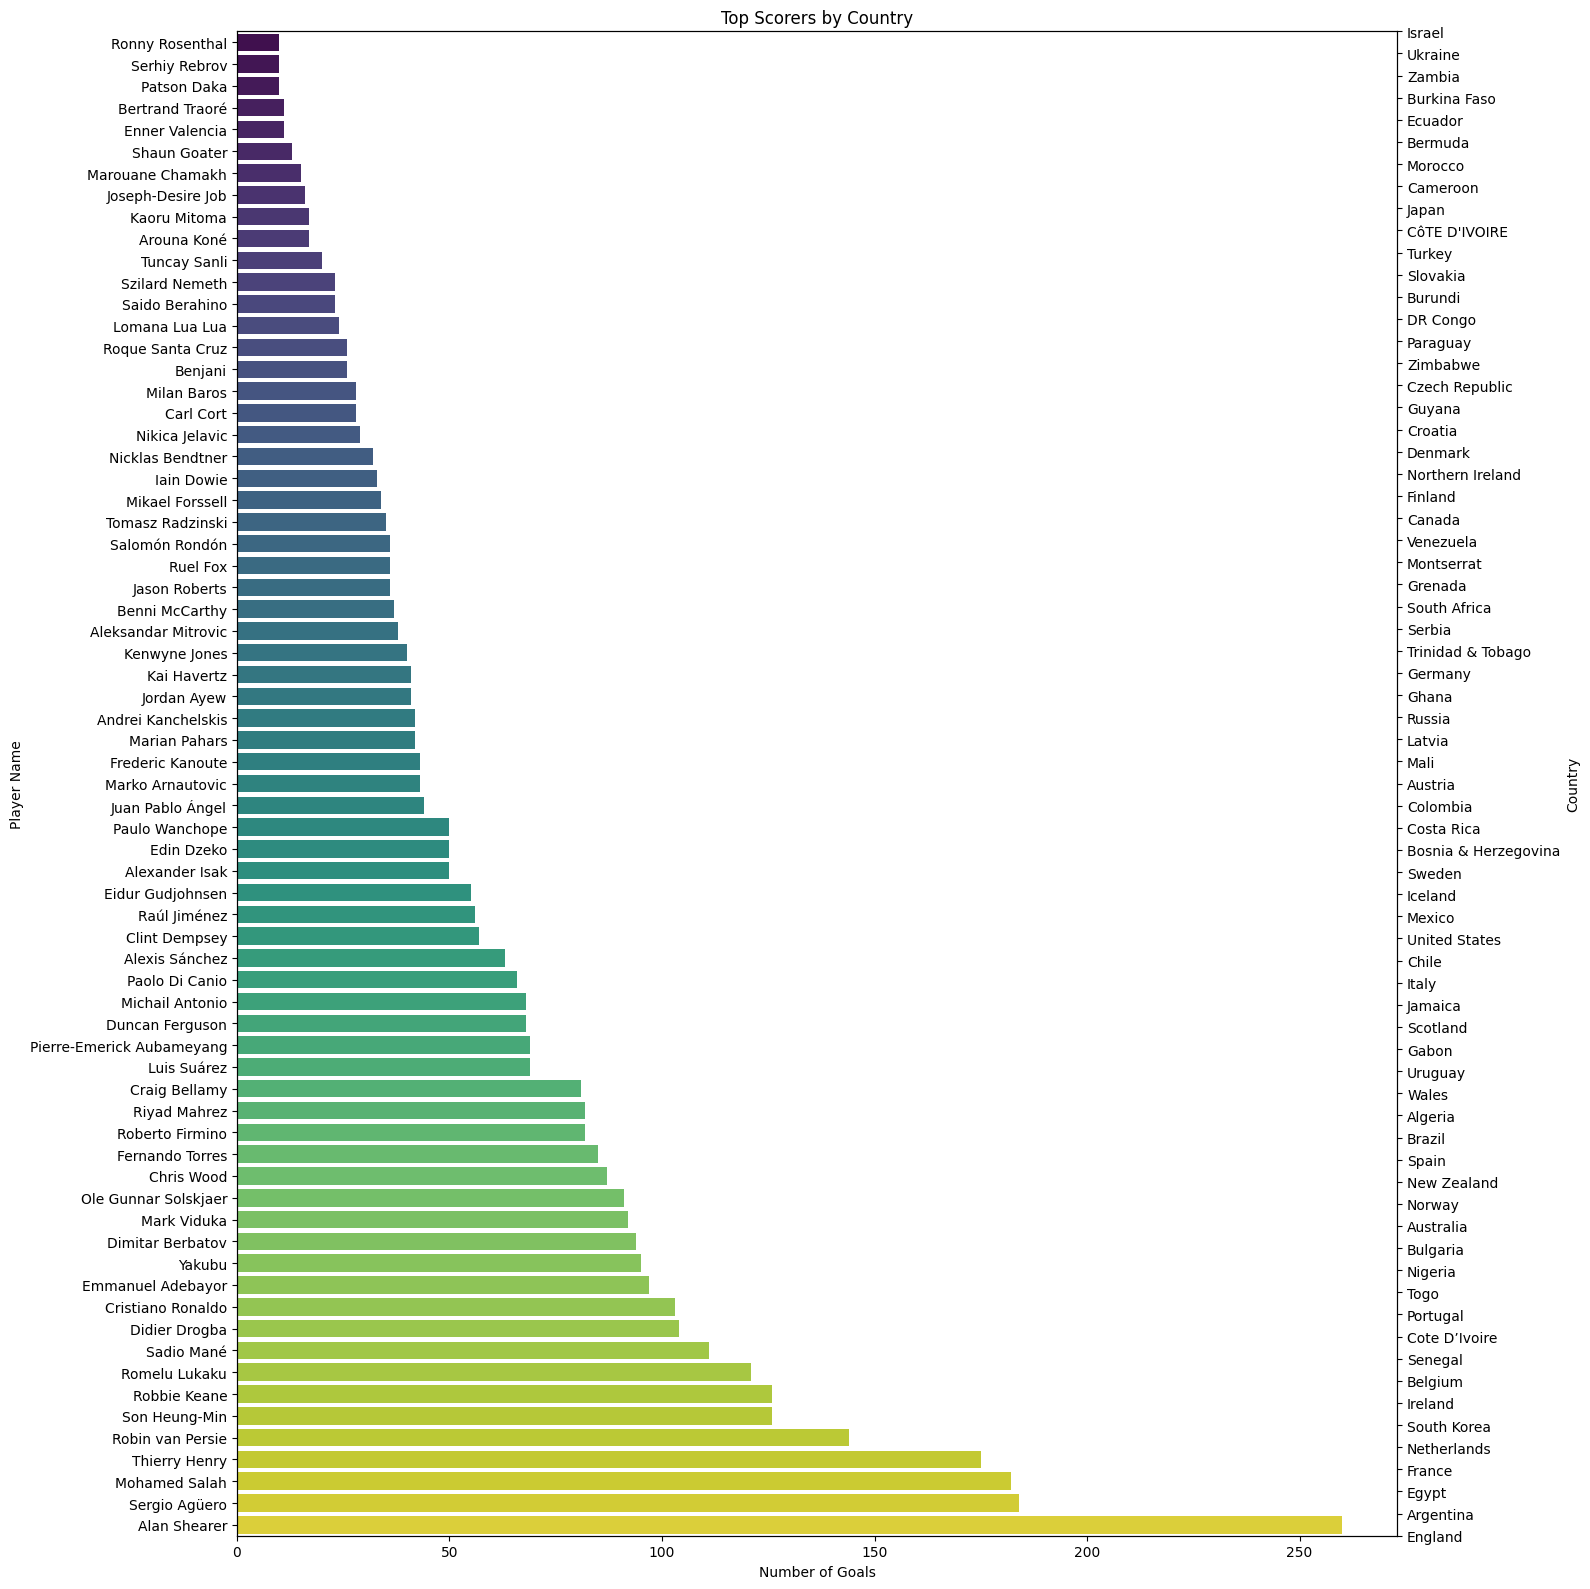

In [9]:
top_scorers = df_processed.loc[df_processed.groupby('country')['goals'].idxmax()].reset_index(drop=True)  # thay vào chỉ số muốn visualize
# top_scorers = top_scorers.head(50)


top_scorers = top_scorers.sort_values(by='goals', ascending=True)

# Vẽ biểu đồ nằm ngang
fig, ax1 = plt.subplots(figsize=(16, 16))  # rộng 16 dài 10

# Vẽ biểu đồ
sns.barplot(x='goals', y='name', data=top_scorers, palette='viridis', ax=ax1)
ax1.set_xlabel('Number of Goals')
ax1.set_ylabel('Player Name')
ax1.set_title('Top Scorers by Country')

# Tạo trục y thứ hai cho quốc gia
ax2 = ax1.twinx()
ax2.set_yticks(ax1.get_yticks())
ax2.set_yticklabels(top_scorers['country'][::-1])
ax2.set_ylabel('Country')

fig.tight_layout()
plt.show()

giá trị trung bình của các chỉ số, ví dụ lấy chí số: goals

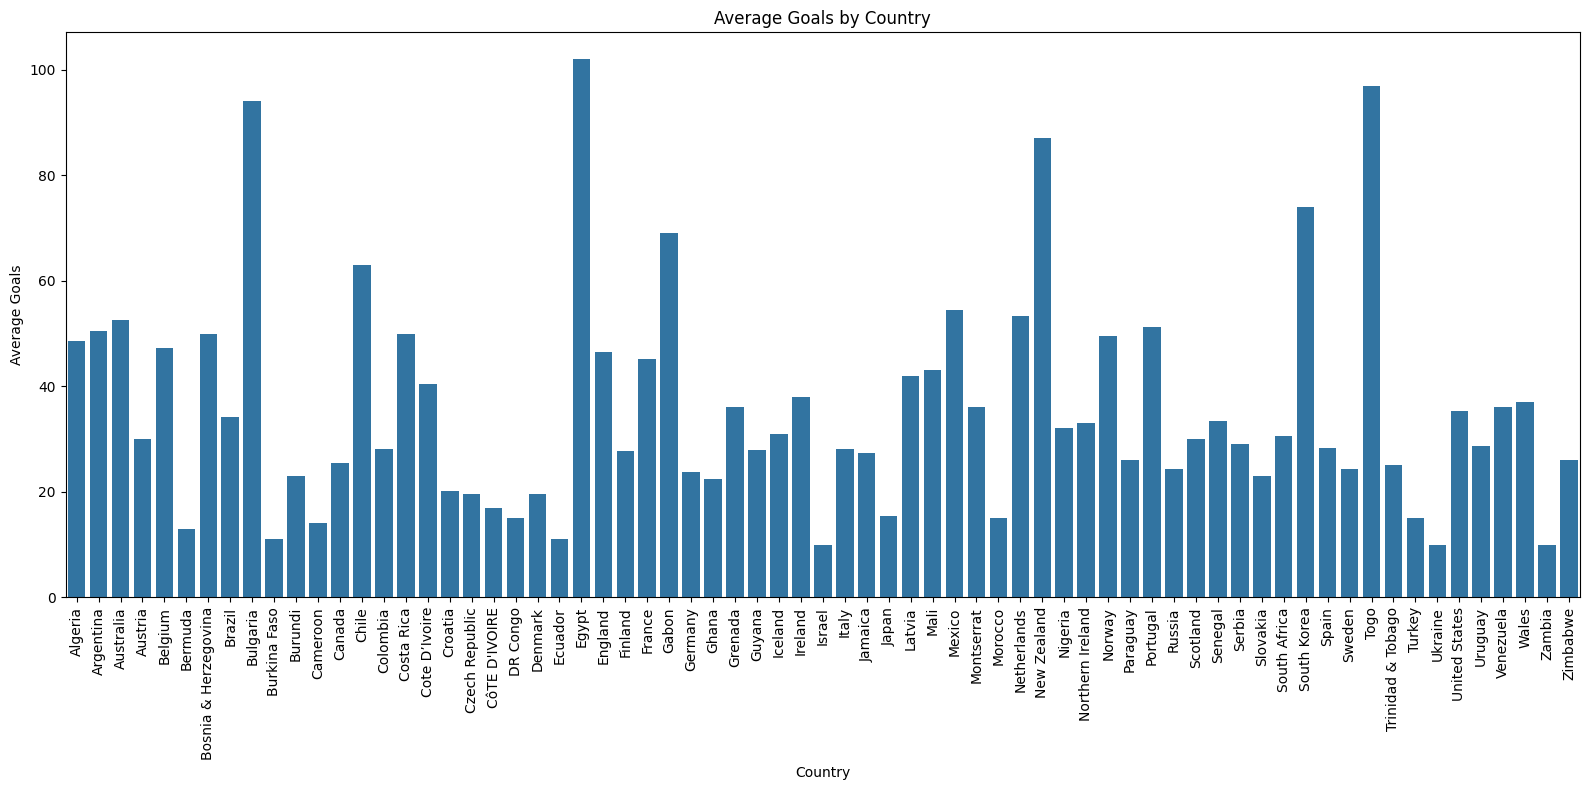

In [10]:
grouped_data = df_processed.groupby('country').agg({
    'goals': 'mean'
}).reset_index()

plt.figure(figsize=(16, 8))  # kích thước dài:16 cao:8

sns.barplot(x='country', y='goals', data=grouped_data)
plt.xticks(rotation=90)  # Xoay nhãn trục x để dễ đọc hơn
plt.title('Average Goals by Country')
plt.xlabel('Country')
plt.ylabel('Average Goals')
plt.tight_layout()  # Điều chỉnh các thông số của subplot để có bố cục chặt chẽ

plt.show()

# Nhận xét

In [11]:
for column in df_processed.columns:
    if df_processed[column].dtype == 'object':
        if '%' in df_processed[column].iloc[0]:
            df_processed[column] = df_processed[column].str.replace('%', '').astype(float)
        else:
            try:
                df_processed[column] = df_processed[column].astype(float)
            except ValueError:
                continue

# Chọn các chỉ số
metrics = ['goals', 'assists', 'shooting_accuracy', 'big_chances_missed', 'headed_goals', 'goals_per_match', 'passes', 'crosses']

# Kiểm tra và loại bỏ các chỉ số không tồn tại trong DataFrame
metrics = [metric for metric in metrics if metric in df_processed.columns]

# Hàm để in bảng
def print_table(data, metric):
    print(f"\nTop 3 countries by {metric}:")
    print("_" * 40)
    print("| {:<15} | {:<15} |".format("Country", "Average Value"))
    print("|" + "-" * 35 + "|")
    for index, row in data.iterrows():
        print("| {:<15} | {:<15.2f} |".format(row['country'], row['average_value']))
    print("_" * 40)

# Tính toán trung bình các chỉ số cho từng quốc gia và lấy top 3
for metric in metrics:
    avg_metric_by_country = df_processed.groupby('country')[metric].mean().reset_index()
    top_3_countries = avg_metric_by_country.sort_values(by=metric, ascending=False).head(3)
    top_3_countries['average_value'] = top_3_countries[metric]
    top_3_countries = top_3_countries[['country', 'average_value']]
    print_table(top_3_countries, metric)


Top 3 countries by goals:
________________________________________
| Country         | Average Value   |
|-----------------------------------|
| Egypt           | 102.00          |
| Togo            | 97.00           |
| Bulgaria        | 94.00           |
________________________________________

Top 3 countries by assists:
________________________________________
| Country         | Average Value   |
|-----------------------------------|
| Egypt           | 46.00           |
| Montserrat      | 44.00           |
| Bulgaria        | 40.00           |
________________________________________

Top 3 countries by shooting_accuracy:
________________________________________
| Country         | Average Value   |
|-----------------------------------|
| Zambia          | 53.00           |
| Grenada         | 49.00           |
| New Zealand     | 49.00           |
________________________________________

Top 3 countries by big_chances_missed:
________________________________________
| Countr

ví dụ: salah quá vượt trội ở các chỉ số khiến cho Ai Cập trở nên cao ở mọi chỉ số => sẽ xét các quốc gia có trên 3 tiền đạo thì mới tính

In [12]:
for column in df_processed.columns:
    if df_processed[column].dtype == 'object':
        if '%' in df_processed[column].iloc[0]:
            df_processed[column] = df_processed[column].str.replace('%', '').astype(float)
        else:
            try:
                df_processed[column] = df_processed[column].astype(float)
            except ValueError:
                continue

# Chọn các chỉ số để tính toán
metrics = ['goals', 'assists', 'shooting_accuracy', 'big_chances_missed', 'headed_goals', 'goals_per_match', 'passes', 'crosses']

# Kiểm tra và loại bỏ các chỉ số không tồn tại trong DataFrame
metrics = [metric for metric in metrics if metric in df_processed.columns]

# Lọc các quốc gia có ít nhất 3 tiền đạo
country_counts = df_processed['country'].value_counts()
countries_with_enough_players = country_counts[country_counts >= 3].index
df_filtered = df_processed[df_processed['country'].isin(countries_with_enough_players)]

# Hàm để in bảng
def print_table(data, metric):
    print(f"\nTop 3 countries by {metric}:")
    print("_" * 40)
    print("| {:<15} | {:<15} |".format("Country", "Average Value"))
    print("|" + "-" * 35 + "|")
    for index, row in data.iterrows():
        print("| {:<15} | {:<15.2f} |".format(row['country'], row['average_value']))
    print("_" * 40)

# Tính toán trung bình các chỉ số cho từng quốc gia và lấy top 3
for metric in metrics:
    avg_metric_by_country = df_filtered.groupby('country')[metric].mean().reset_index()
    top_3_countries = avg_metric_by_country.sort_values(by=metric, ascending=False).head(3)
    top_3_countries['average_value'] = top_3_countries[metric]
    top_3_countries = top_3_countries[['country', 'average_value']]
    print_table(top_3_countries, metric)


Top 3 countries by goals:
________________________________________
| Country         | Average Value   |
|-----------------------------------|
| Netherlands     | 53.27           |
| Australia       | 52.67           |
| Portugal        | 51.25           |
________________________________________

Top 3 countries by assists:
________________________________________
| Country         | Average Value   |
|-----------------------------------|
| Portugal        | 30.75           |
| Netherlands     | 25.64           |
| France          | 19.57           |
________________________________________

Top 3 countries by shooting_accuracy:
________________________________________
| Country         | Average Value   |
|-----------------------------------|
| Finland         | 43.70           |
| Wales           | 43.03           |
| Jamaica         | 42.11           |
________________________________________

Top 3 countries by big_chances_missed:
________________________________________
| Countr

thống kê hiệu quả của tiền đạo theo chỉ số trung bình

In [13]:
import pandas as pd

# Giả sử df_processed là DataFrame đã được xử lý trước đó

# Kiểm tra và chuyển đổi các cột thành dạng số nếu cần thiết
for column in df_processed.columns:
    if df_processed[column].dtype == 'object':
        if '%' in df_processed[column].iloc[0]:
            df_processed[column] = df_processed[column].str.replace('%', '').astype(float)
        else:
            try:
                df_processed[column] = df_processed[column].astype(float)
            except ValueError:
                continue

# Chọn các chỉ số để tính toán
numeric_metrics = ['goals', 'assists', 'shooting_accuracy', 'big_chances_missed', 'headed_goals',
                   'goals_per_match', 'big_chances_created', 'hit_woodwork']

# Kiểm tra và loại bỏ các chỉ số không tồn tại trong DataFrame
numeric_metrics = [metric for metric in numeric_metrics if metric in df_processed.columns]

# Lọc các quốc gia có ít nhất 3 tiền đạo
country_counts = df_processed['country'].value_counts()
countries_with_enough_players = country_counts[country_counts >= 3].index
df_filtered = df_processed[df_processed['country'].isin(countries_with_enough_players)]

# format bảng
def print_table(data, striker_type):
    print(f"\nTop 3 countries for {striker_type} Striker:")
    print("_" * 82)
    print("| {:<25} | {:<15} | {:<15} | {:<15} |".format("Type", "Country", "player_satisfy", "Total Players"))
    print("|" + "-" * 81 + "|")
    for index, row in data.iterrows():
        print("| {:<25} | {:<15} | {:<15} | {:<15} |".format(striker_type, row['country'], row['count'], row['total_players']))
    print("_" * 82)

# Hàm để tính toán và in top 3 quốc gia cho mỗi loại tiền đạo
def analyze_striker_type(df, striker_type, conditions):
    df_type = df.copy()

    # Lọc dữ liệu dựa trên các điều kiện percentile đã cho
    for metric, percentile in conditions:
        # Tính toán ngưỡng phân vị cho mỗi chỉ số
        threshold = df[metric].quantile(percentile / 100.0)
        # Lọc các cầu thủ có chỉ số lớn hơn ngưỡng đã tính
        df_type = df_type[df_type[metric] > threshold]

    # Tính toán giá trị trung bình của các chỉ số cho mỗi quốc gia
    avg_metric_by_country = df_type.groupby('country').mean(numeric_only=True).reset_index()

    # Tính toán số lượng cầu thủ cho mỗi quốc gia
    avg_metric_by_country['count'] = df_type['country'].value_counts().reindex(avg_metric_by_country['country']).values

    # Thêm cột tổng số cầu thủ có quốc tịch đó
    avg_metric_by_country['total_players'] = df_filtered['country'].value_counts().reindex(avg_metric_by_country['country']).values

    # Lọc các quốc gia có ít nhất 3 cầu thủ thỏa mãn điều kiện
    avg_metric_by_country = avg_metric_by_country[avg_metric_by_country['count'] >= 2]  # số cầu thủ thỏa mãn phải lớn hơn > 2

    # Sắp xếp các quốc gia theo giá trị trung bình của chỉ số đầu tiên trong điều kiện
    top_3_countries = avg_metric_by_country.sort_values(by=conditions[0][0], ascending=False).head(3)

    top_3_countries = top_3_countries[['country', 'count', 'total_players']]
    print_table(top_3_countries, striker_type)

# Xác định các loại tiền đạo và điều kiện
striker_types = {
    'Poacher': [('goals', 50), ('goals_per_match', 50), ('shooting_accuracy', 50), ('headed_goals', 20)],                                                         # Sát thủ vòng cấm
    'Complete': [('goals', 75), ('assists', 50), ('shooting_accuracy', 50), ('big_chances_created', 70)],                                                         # Tiền đạo toàn diện
    'Target Man': [('headed_goals', 75), ('shooting_accuracy', 50)],                                                                                              # Tiền đạo mục tiêu
    'False 9': [('goals', 50), ('assists', 80), ('big_chances_created', 70)],                                                                                     # Số 9 Ảo
    'Advanced Forward': [('goals', 50), ('shooting_accuracy', 50), ('big_chances_missed', 50), ('headed_goals', 50)],                                             # Tiền đạo cắm hiện đại
    'Clinical': [('goals', 80), ('shooting_accuracy', 80), ('big_chances_missed', 50)],                                                                           # Tiền đạo sắc bén
    'Average': [('goals', 50), ('goals_per_match', 50), ('shooting_accuracy', 50), ('headed_goals', 50), ('assists', 50), ('big_chances_created', 50)],           # Tiền đạo trung bình
    'Deep-lying': [('assists', 75), ('big_chances_created', 75)],                                                                                                 # Tiền đạo lùi sâu
    'Unlucky': [('hit_woodwork', 70), ('big_chances_missed', 70)]                                                                                                 # Tiền đạo kém may mắn
}

for striker_type, conditions in striker_types.items():
    analyze_striker_type(df_filtered, striker_type, conditions) # xếp theo giá trị trung bình từ cao xuống thấp


Top 3 countries for Poacher Striker:
__________________________________________________________________________________
| Type                      | Country         | player_satisfy  | Total Players   |
|---------------------------------------------------------------------------------|
| Poacher                   | England         | 16              | 137             |
| Poacher                   | Belgium         | 2               | 9               |
| Poacher                   | France          | 3               | 21              |
__________________________________________________________________________________

Top 3 countries for Complete Striker:
__________________________________________________________________________________
| Type                      | Country         | player_satisfy  | Total Players   |
|---------------------------------------------------------------------------------|
| Complete                  | England         | 9               | 137             |
| 